<a href="https://colab.research.google.com/github/RohaArslan/COMPUTERVISION/blob/main/Adaptive_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    display_image(noisy_image, title="Image with Gaussian Noise")
    return noisy_image

# Function to display an image
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [17]:
# Adaptive thresholding function with histogram visualization
def adaptive_thresholding_with_histogram(image, grid_size=(10, 10)):
    # Step 1: Add noise and display the noisy image
    noisy_image = add_gaussian_noise(image)

    # Step 2: Apply Gaussian blur to remove noise and display the denoised image
    denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
    display_image(denoised_image, title="Denoised Image")

    # Get image dimensions and calculate grid step sizes
    rows, cols = image.shape
    row_step, col_step = rows // grid_size[0], cols // grid_size[1]

    # Step 3: Adaptive thresholding and displaying histograms
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 12))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            sub_image = denoised_image[i*row_step:(i+1)*row_step, j*col_step:(j+1)*col_step]
            _, thresholded = cv2.threshold(sub_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            axes[i, j].hist(sub_image.ravel(), bins=256)
            axes[i, j].axis('off')

    plt.suptitle("Histograms of Each Sub-Image After Thresholding", fontsize=16)
    plt.show()


    # Display the final thresholded image
    display_image(thresholded, title="Image after Adaptive Thresholding")

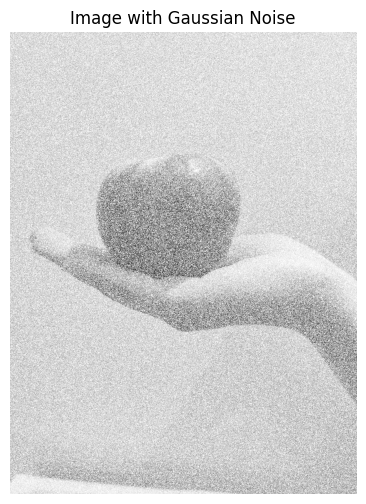

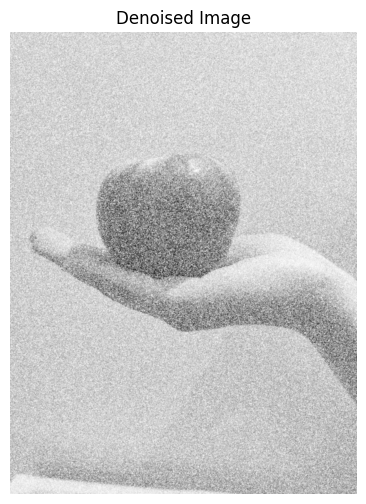

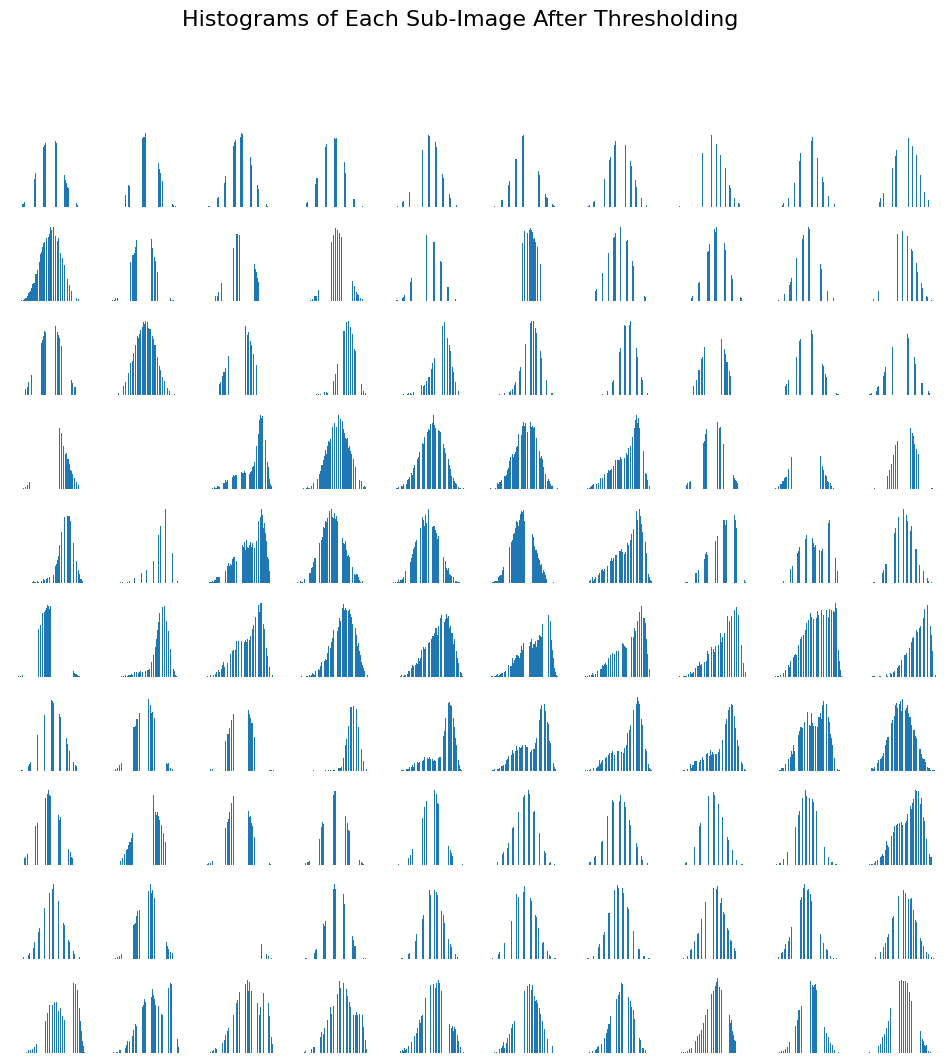

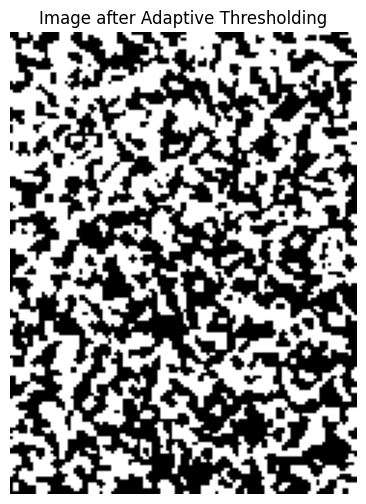

In [18]:
# Specify the path to the image in Google Drive
image_path = "/content/drive/MyDrive/CV/APPLE.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is not None:
    adaptive_thresholding_with_histogram(image, grid_size=(10, 10))
else:
    print("Error: Unable to load image.")